# Projeto 1 - Ciência dos Dados

Nome: Henrique Rizkallah Thomé

## Pergunta (s) a ser respondida

A TEC é benéfica para os países do Mercosul?
Os países membros do Mercosul tem desvantagem em relação aos Estados Associados?


## Explicação da hipótese e mecanismo

O Mercosul é um bloco econômico, formado em 1991, com o objetivo de promover uma maior integração e desenvolvimento dos países membros. Uma das principais diretrizes desse bloco é a existência do TEC (Taxa Externa Comúm), ou seja, os membros tem as mesmas tarifas para os produtos importados e exportados. Devido a TEC os países-membros tem economias mais protegidas e menos livres, umas vez que isso é uma medida protecionista. Dessa forma, procura estudar se o TEC é prejudicial para os país, pois acredita-se que isso aumenta o custo do país e atrapalhas as importações e exportações com o resto do mundo, tendo um efeito negativo ao PIB.
Atualmente existem duas categorias principais de países: os membros e os Estados Associados. A principal diferenças entre esses dois é que os Estados Associados não adotam a TEC. Assim, vamos analisar e comparar os dados de crescimento do PIB e porcentagem do PIB relativo ao comércio, desde 1991 (data da criação do bloco), entre os paises membros e os associados.

Países membros: Argentina, Brasil, Uruguai e Paraguai
Países Associados: Chile (desde 1996), Peru (desde 2003), Colômbia, Equador (desde 2004), Guiana, Suriname (desde 2013)

Essa hipótese é baseada nas críticas do atual ministro da fazenda Paulo Guedes ao Mercosul. 
https://g1.globo.com/economia/noticia/2018/10/30/declaracoes-de-paulo-guedes-sobre-mercosul-surpreendem-membros-do-bloco.ghtml

## Bases de dados usadas

https://www.gapminder.org/tools/#$state$marker$hook$which=merchandise_trade_percent_of_gdp&scaleType=linear&spaceRef:null;;;&chart-type=spreadsheet

https://www.gapminder.org/tools/#$state$marker$hook$which=gdp_total_yearly_growth&scaleType=linear&spaceRef:null;;;&chart-type=spreadsheet

## Selecionando dados e limpeza


In [59]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches

In [60]:
dados_comercio = pd.read_excel('merchandise_trade_percent_of_gdp.xlsx', index_col=False)
dados_crescimento = pd.read_excel('gdp_total_yearly_growth.xlsx',index=False)

Colando o nome dos países como index das tabelas e arrumando os eixos x e y

In [61]:
dados_comercio_por_ano = dados_comercio.set_index('country').transpose()
dados_crescimento_pais = dados_crescimento.set_index('country').transpose()

Criando dataframe de comércio e crescimento dos países membros do Mercosul desde 1991

In [62]:
comercio_mercosul1 = dados_comercio_por_ano[(dados_comercio_por_ano.index>=1991)][['Brazil','Argentina','Uruguay','Paraguay']]
crescimento_mercosul1 = dados_crescimento_pais[(dados_crescimento_pais.index>=1991)][['Brazil','Argentina','Uruguay','Paraguay']]

Criando dataframe de comércio e crescimento dos países Associados do Mercosul desde 1991

In [63]:
comercio_associados1 = dados_comercio_por_ano[(dados_comercio_por_ano.index>=1991)][['Chile','Peru','Colombia','Ecuador','Suriname','Guyana']]
crescimento_associados1 = dados_crescimento_pais[(dados_crescimento_pais.index>=1991)][['Chile','Peru','Colombia','Ecuador','Suriname','Guyana']]

In [64]:
comercio_mercosul = comercio_mercosul1.transpose()
crescimento_mercosul = crescimento_mercosul1.transpose()
comercio_associados = comercio_associados1.transpose()
crescimento_associados = crescimento_associados1.transpose()

Criando uma variável qualitativa para verificar se o pais é ou não membro

In [65]:
faz_parte = ['sim','sim','sim','sim']
nao_faz = ['nao','nao','nao','nao','nao','nao']
comercio_mercosul['Mercosul'] = faz_parte
crescimento_mercosul['Mercosul'] = faz_parte
comercio_associados['Mercosul'] = nao_faz
crescimento_associados['Mercosul'] = nao_faz

Juntando os dataframes

In [66]:
crescimento_todos = pd.concat([crescimento_mercosul, crescimento_associados])
comercio_todos = pd.concat([comercio_associados,comercio_mercosul])

Criando Dataframe para antes do Mercosul

In [67]:
comercio_mercosul_a = dados_comercio_por_ano[(dados_comercio_por_ano.index>=1971)&(dados_comercio_por_ano.index<1991)][['Brazil','Argentina','Uruguay','Paraguay']].transpose()
crescimento_mercosul_a = dados_crescimento_pais[(dados_crescimento_pais.index>=1971)&(dados_crescimento_pais.index<1991)][['Brazil','Argentina','Uruguay','Paraguay']].transpose()
comercio_associados_a = dados_comercio_por_ano[(dados_comercio_por_ano.index>=1971)&(dados_comercio_por_ano.index<1991)][['Chile','Peru','Colombia','Ecuador','Suriname','Guyana']].transpose()
crescimento_associados_a = dados_crescimento_pais[(dados_crescimento_pais.index>=1971)&(dados_crescimento_pais.index<1991)][['Chile','Peru','Colombia','Ecuador','Suriname','Guyana']].transpose()
comercio_mercosul_a['Mercosul'] = faz_parte
crescimento_mercosul_a['Mercosul']=faz_parte
comercio_associados_a['Mercosul']=nao_faz
crescimento_associados_a['Mercosul']=nao_faz
crescimento_todos_a = pd.concat([crescimento_mercosul_a,crescimento_associados_a])
comercio_todos_a = pd.concat([comercio_mercosul_a,comercio_associados_a])

## Análise de dados

Insira abaixo uma análise de dados tratada para ter maior clareza. 

Lembre-se de que, além deste arquivo principal, você precisa entregar um ou mais *notebooks* mais brutos com todas as tentativas que fez e que não deram certo .

**Não inclua dados ou gráficos sem motivação nem interpretação** - sempre que fizer uma análise, plot ou tablea, diga qual sua intenção. Logo após a apresentação diga qual conclusão específica ou interpretação você tira daquela análise

#### Vamos analisar a evolução das trocas comercias. Para isso foi usado dados de 1970 até 2013, de modo a poder comparar antes e depois do Mercosul

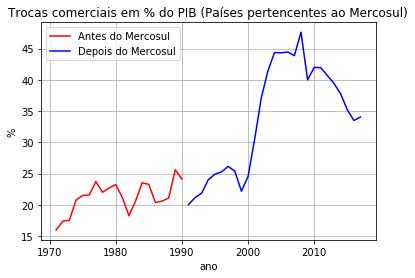

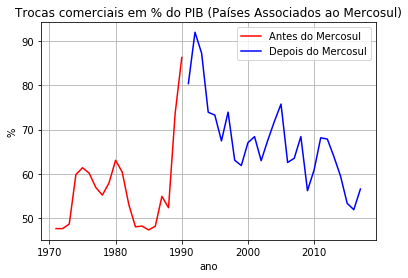

In [68]:
plt.title('Trocas comerciais em % do PIB (Países pertencentes ao Mercosul)')
plt.ylabel('%')
plt.xlabel('ano')
x = plt.plot(comercio_mercosul_a.mean(),c = 'r', label = 'Antes do Mercosul')
plt.plot( comercio_mercosul.mean(),c = 'b', label = 'Depois do Mercosul')
plt.legend()
plt.grid(True)
plt.show()
plt.title('Trocas comerciais em % do PIB (Países Associados ao Mercosul)')
plt.ylabel('%')
plt.xlabel('ano')
plt.plot(comercio_associados_a.mean(),c = 'r', label = 'Antes do Mercosul')
plt.plot(comercio_associados.mean(),c = 'b', label = 'Depois do Mercosul')
plt.legend()
plt.grid(True)

Como podemos ver, após a criação do Mercosul os países membros tiveram um grande crescimento em suas trocas comercias e seguem em uma tendencia de crescimento. Os países associados, por outro lado tiveram forte queda e tem uma clara tendencia de queda

#### Usaremos o BloxPlot para verificiar se não existem outliers que prejudicam a análise

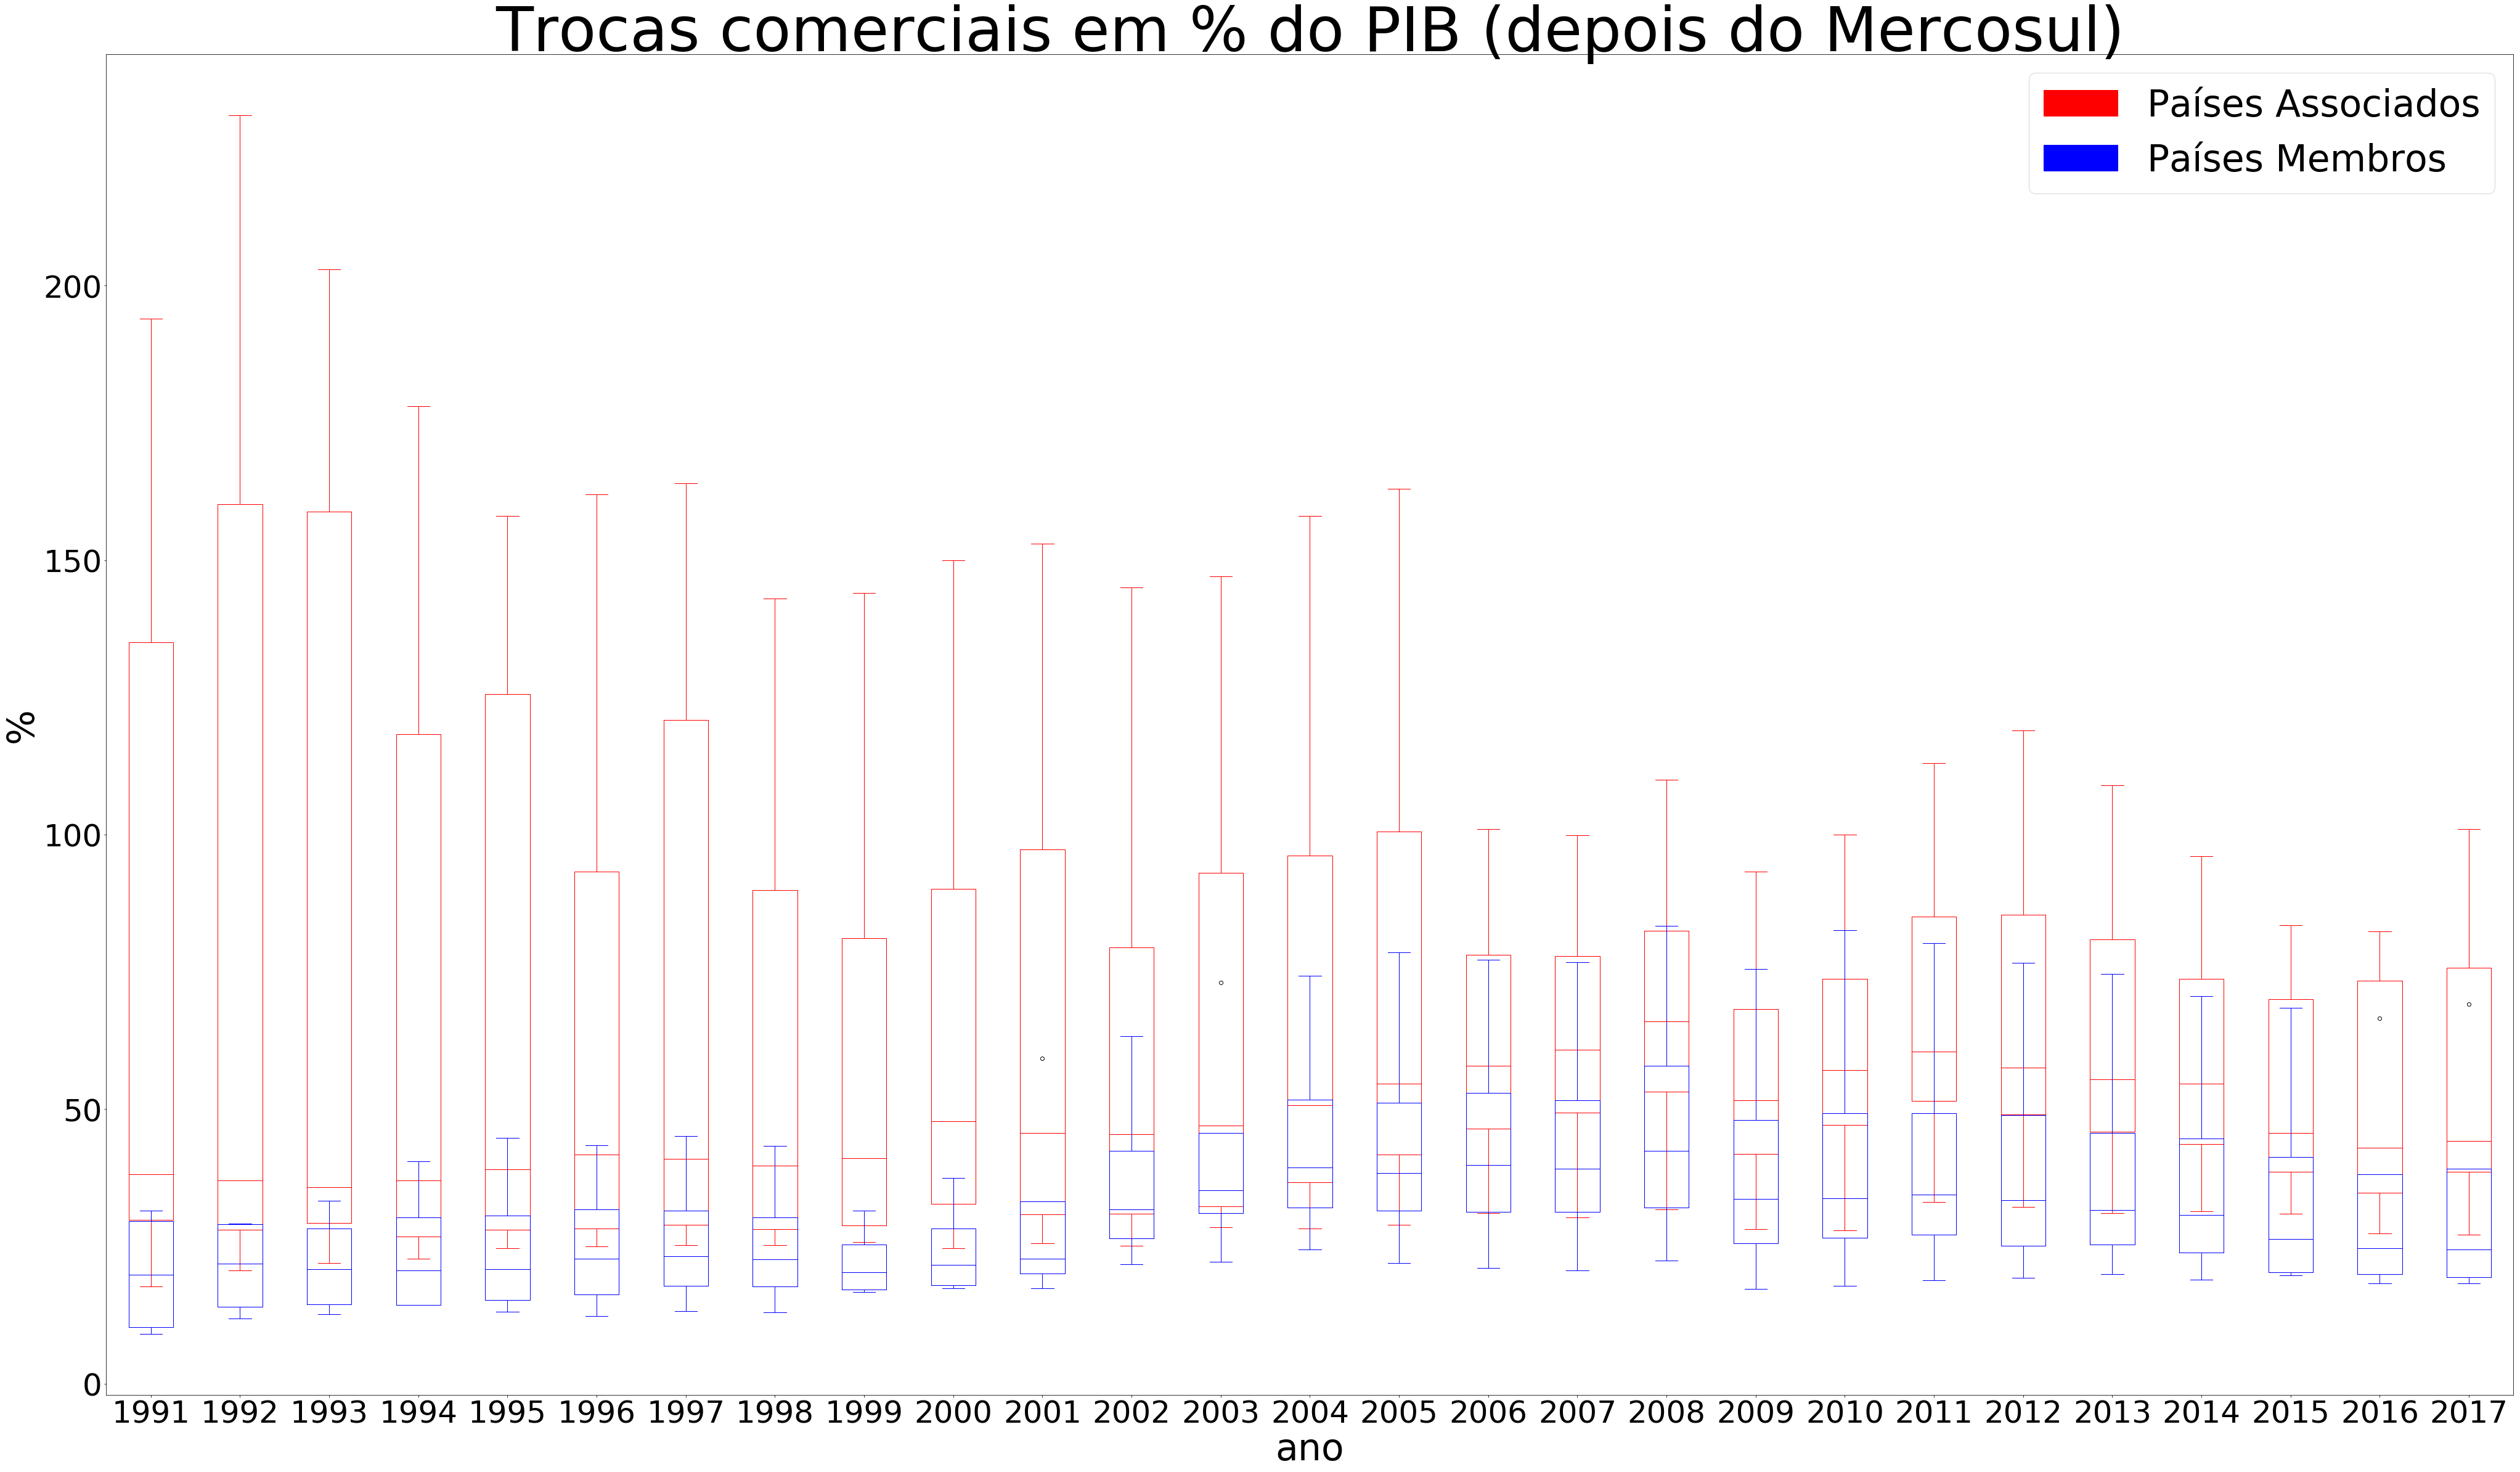

In [69]:
ax = comercio_todos[comercio_todos.Mercosul == 'nao'].plot.box(figsize=(70,40), color="r", label = 'teste') 
comercio_todos[comercio_todos.Mercosul == 'sim'].plot.box(ax=ax,figsize=(70,40),color = 'b',label = 'fodasse')
plt.ylabel('%',size = 60)
plt.title('Trocas comerciais em % do PIB (depois do Mercosul)', size = 100)
plt.xlabel('ano',size = 60)
plt.tick_params(axis='x', labelsize=50)
plt.tick_params(axis='y', labelsize=50)
red_patch = mpatches.Patch(color='red', label='Países Associados')
blue_patch = mpatches.Patch(color='blue', label='Países Membros')
plt.legend(handles=[red_patch, blue_patch],fontsize=(60))
plt.show()

O gráfico nos mostra que os países associados possuem mais relações de troca do que os países membros. Apesar disso existe uma quantidade significativa de países associados em que as trocas representam mais de 100% do PIB. Quando isso acontece pode-se dizer que o país está negativado na balança comercial, que significa que sua dívida externa está aumentando e isso tem consequencias ruins para a economia.

saiba mais sobre balança comercial em: https://brasilescola.uol.com.br/geografia/balanca-comercial.htm

#### Gráfico para verificar como as trocas se davam antes da formação do Mercosul

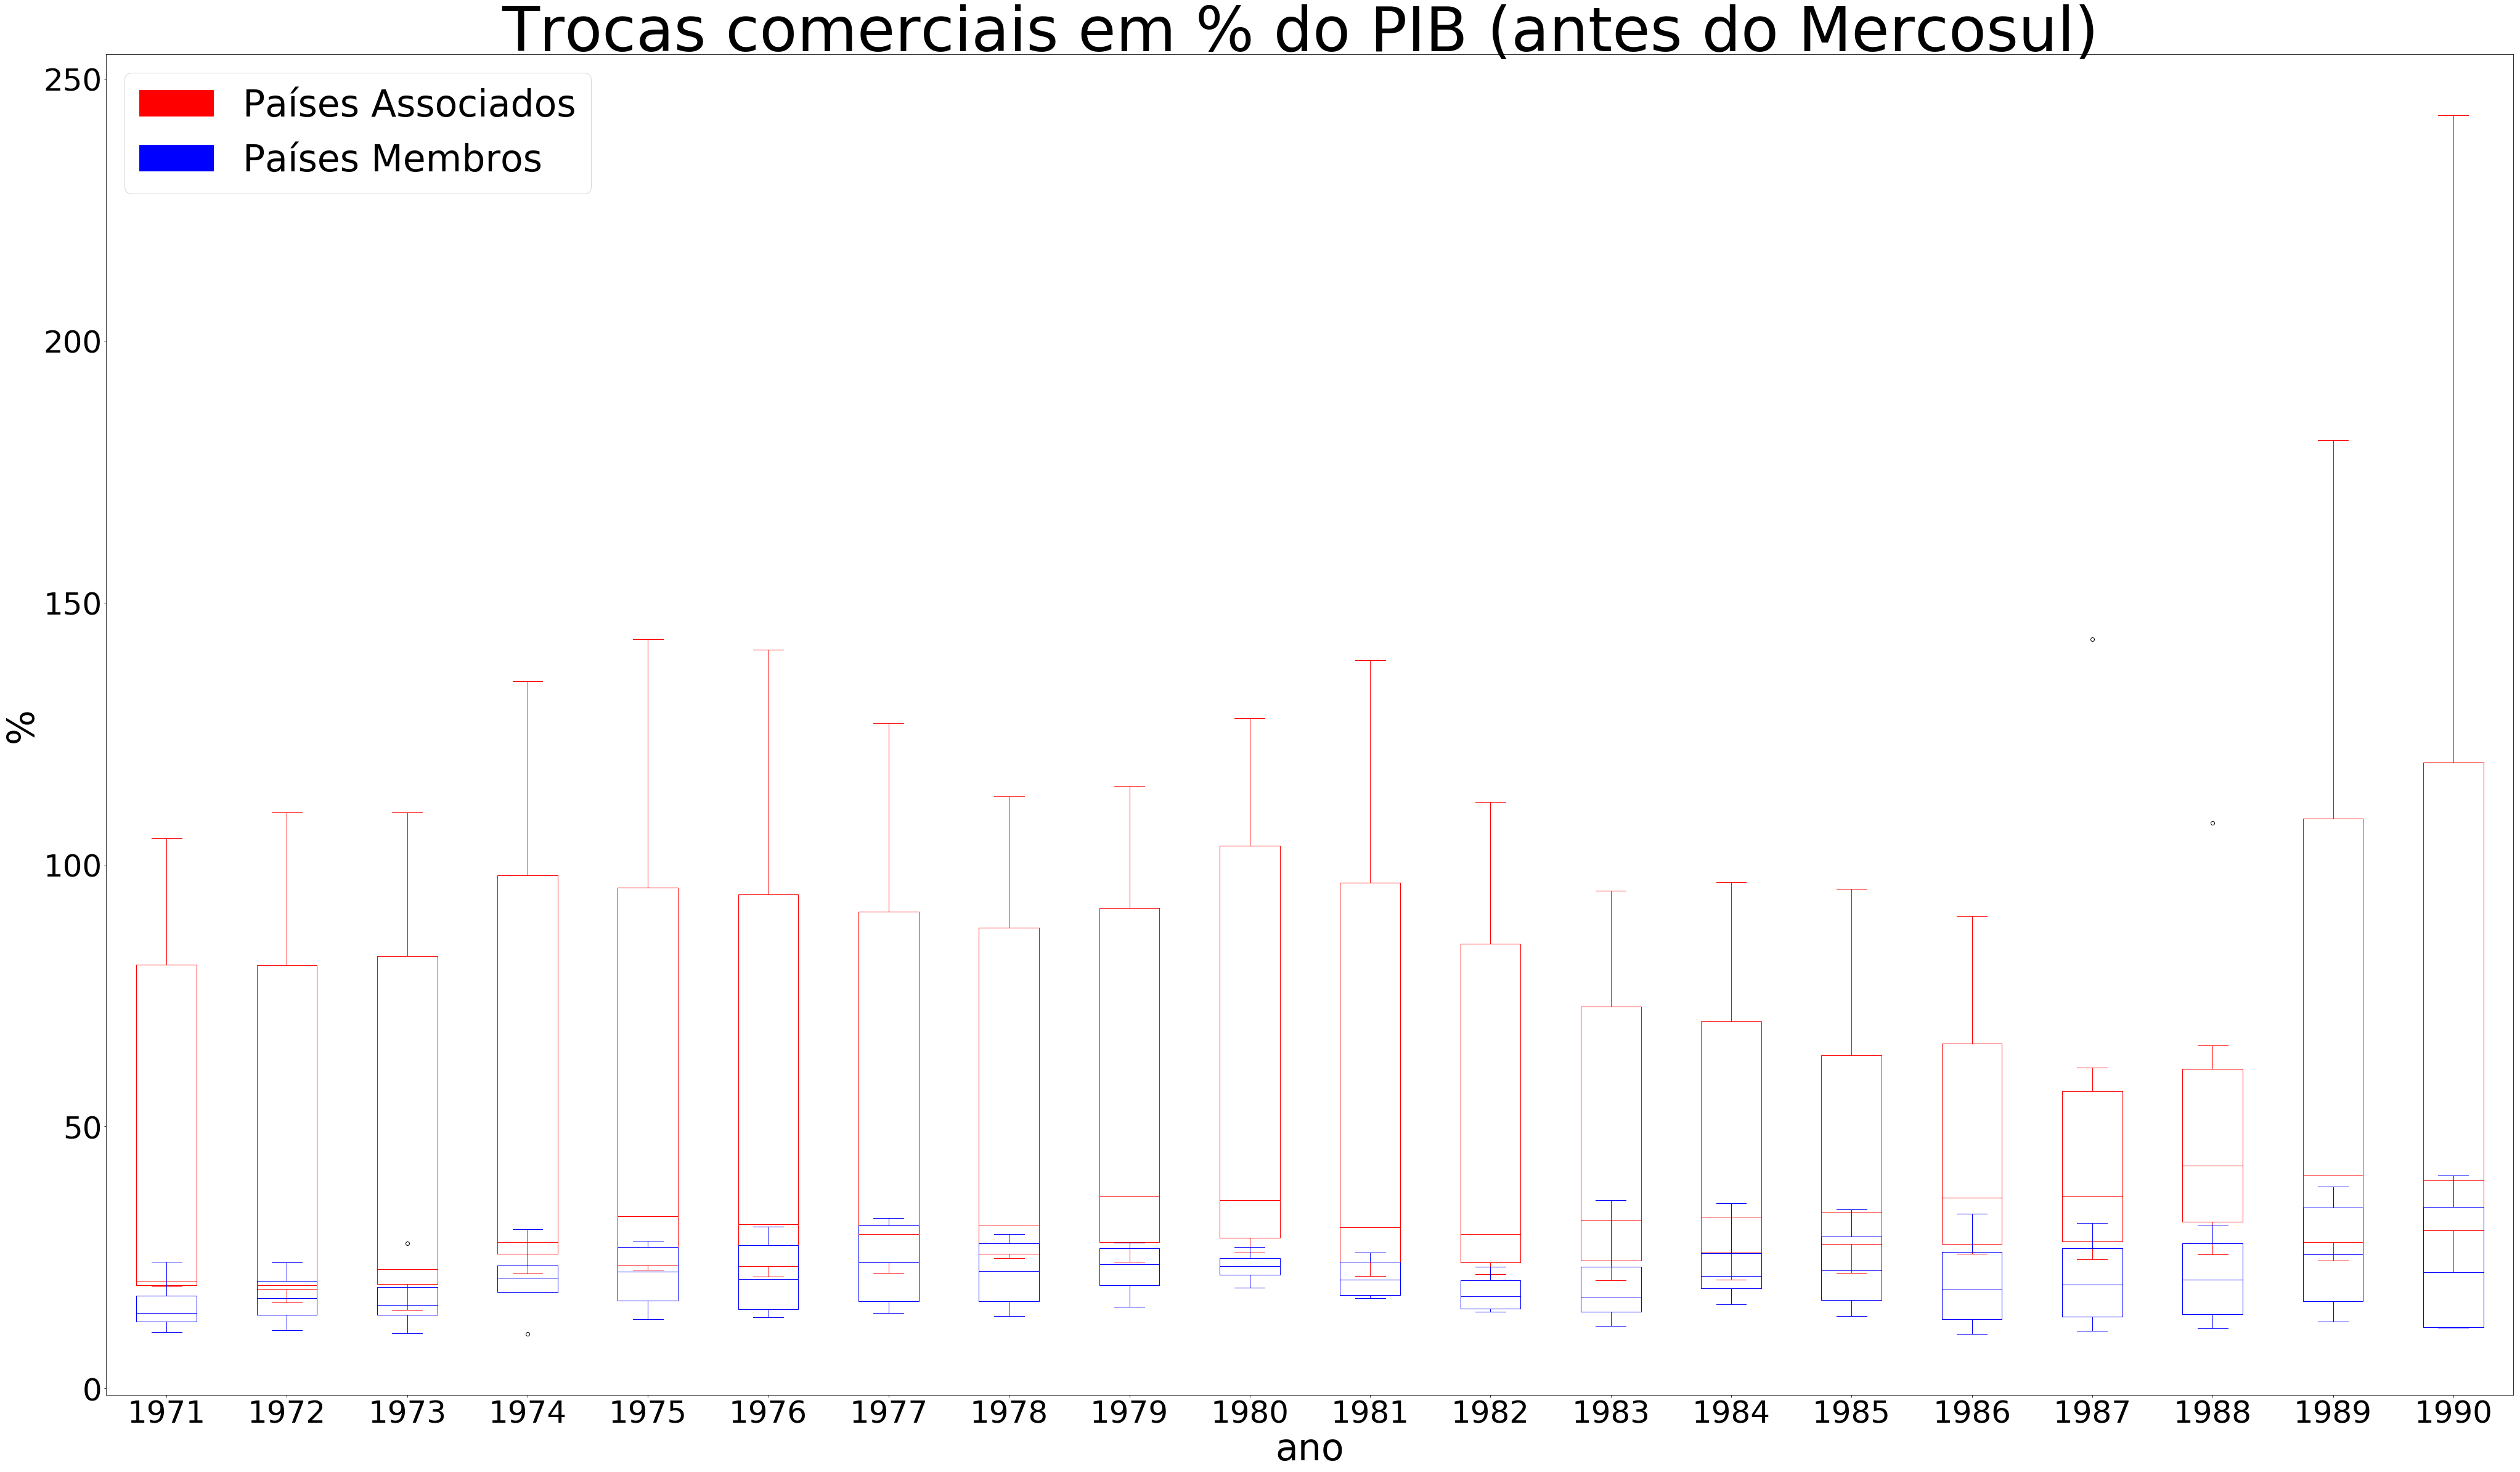

In [70]:
ax = comercio_todos_a[comercio_todos_a.Mercosul == 'nao'].plot.box(figsize=(70,40), color="r", label = 'teste') 
comercio_todos_a[comercio_todos_a.Mercosul == 'sim'].plot.box(ax=ax,figsize=(70,40),color = 'b',label = 'fodasse')
plt.ylabel('%',size = 60)
plt.title('Trocas comerciais em % do PIB (antes do Mercosul) ', size = 100)
plt.xlabel('ano',size = 60)
plt.tick_params(axis='x', labelsize=50)
plt.tick_params(axis='y', labelsize=50)
red_patch = mpatches.Patch(color='red', label='Países Associados')
blue_patch = mpatches.Patch(color='blue', label='Países Membros')
plt.legend(handles=[red_patch, blue_patch],fontsize=(60))
plt.show()

Antes do Mercosul é possível observar os mesmos fenomenos apresentados anteriormente. O número de países com balança comercial negativo, porém, era menor, o que indica que esses países estão piorando em relação a esse aspecto. Outro fator importante a se ressaltar é que os países membros do Mercosul estão em uma crescente, ou seja estão fazendo mais trocas desde a criação do Mercosul e cada vez mais se aproximam dos níveis dos países associdos

#### Gráficos para comparar o crescimento do PIB entre os dois blocos de países. Com esse gráfico vai ser possível ver se algum dos blocos se sai melhor

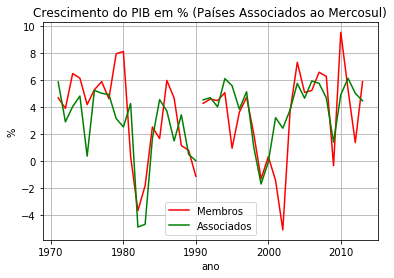

In [71]:
plt.plot(crescimento_mercosul_a.mean(),c = 'r', label = 'Membros')
plt.plot(crescimento_mercosul.mean(),c = 'r',)
plt.title('Crescimento do PIB em % (Países pertencentes ao Mercosul)')
plt.ylabel('%')
plt.xlabel('ano')
plt.legend()
plt.grid(True)
plt.plot(crescimento_associados_a.mean(),c = 'g', label = 'Associados')
plt.plot(crescimento_associados.mean(),c = 'g')
plt.title('Crescimento do PIB em % (Países Associados ao Mercosul)')
plt.ylabel('%')
plt.xlabel('ano')
plt.legend()
plt.grid(True)
plt.show()


Esses gráficos nos mostram que a criação do mercosul não foi positiva para os países membros, uma vez que até 1990 os países que futuramente fariam parte do bloco tinham um crescimento maior, porém após a criação do Mercosul, os países membros passaram a performar pior em relação aos associados

Agora vamos usar o boxplot para verificar se não existem outliers que prejudicam a análise dos dados

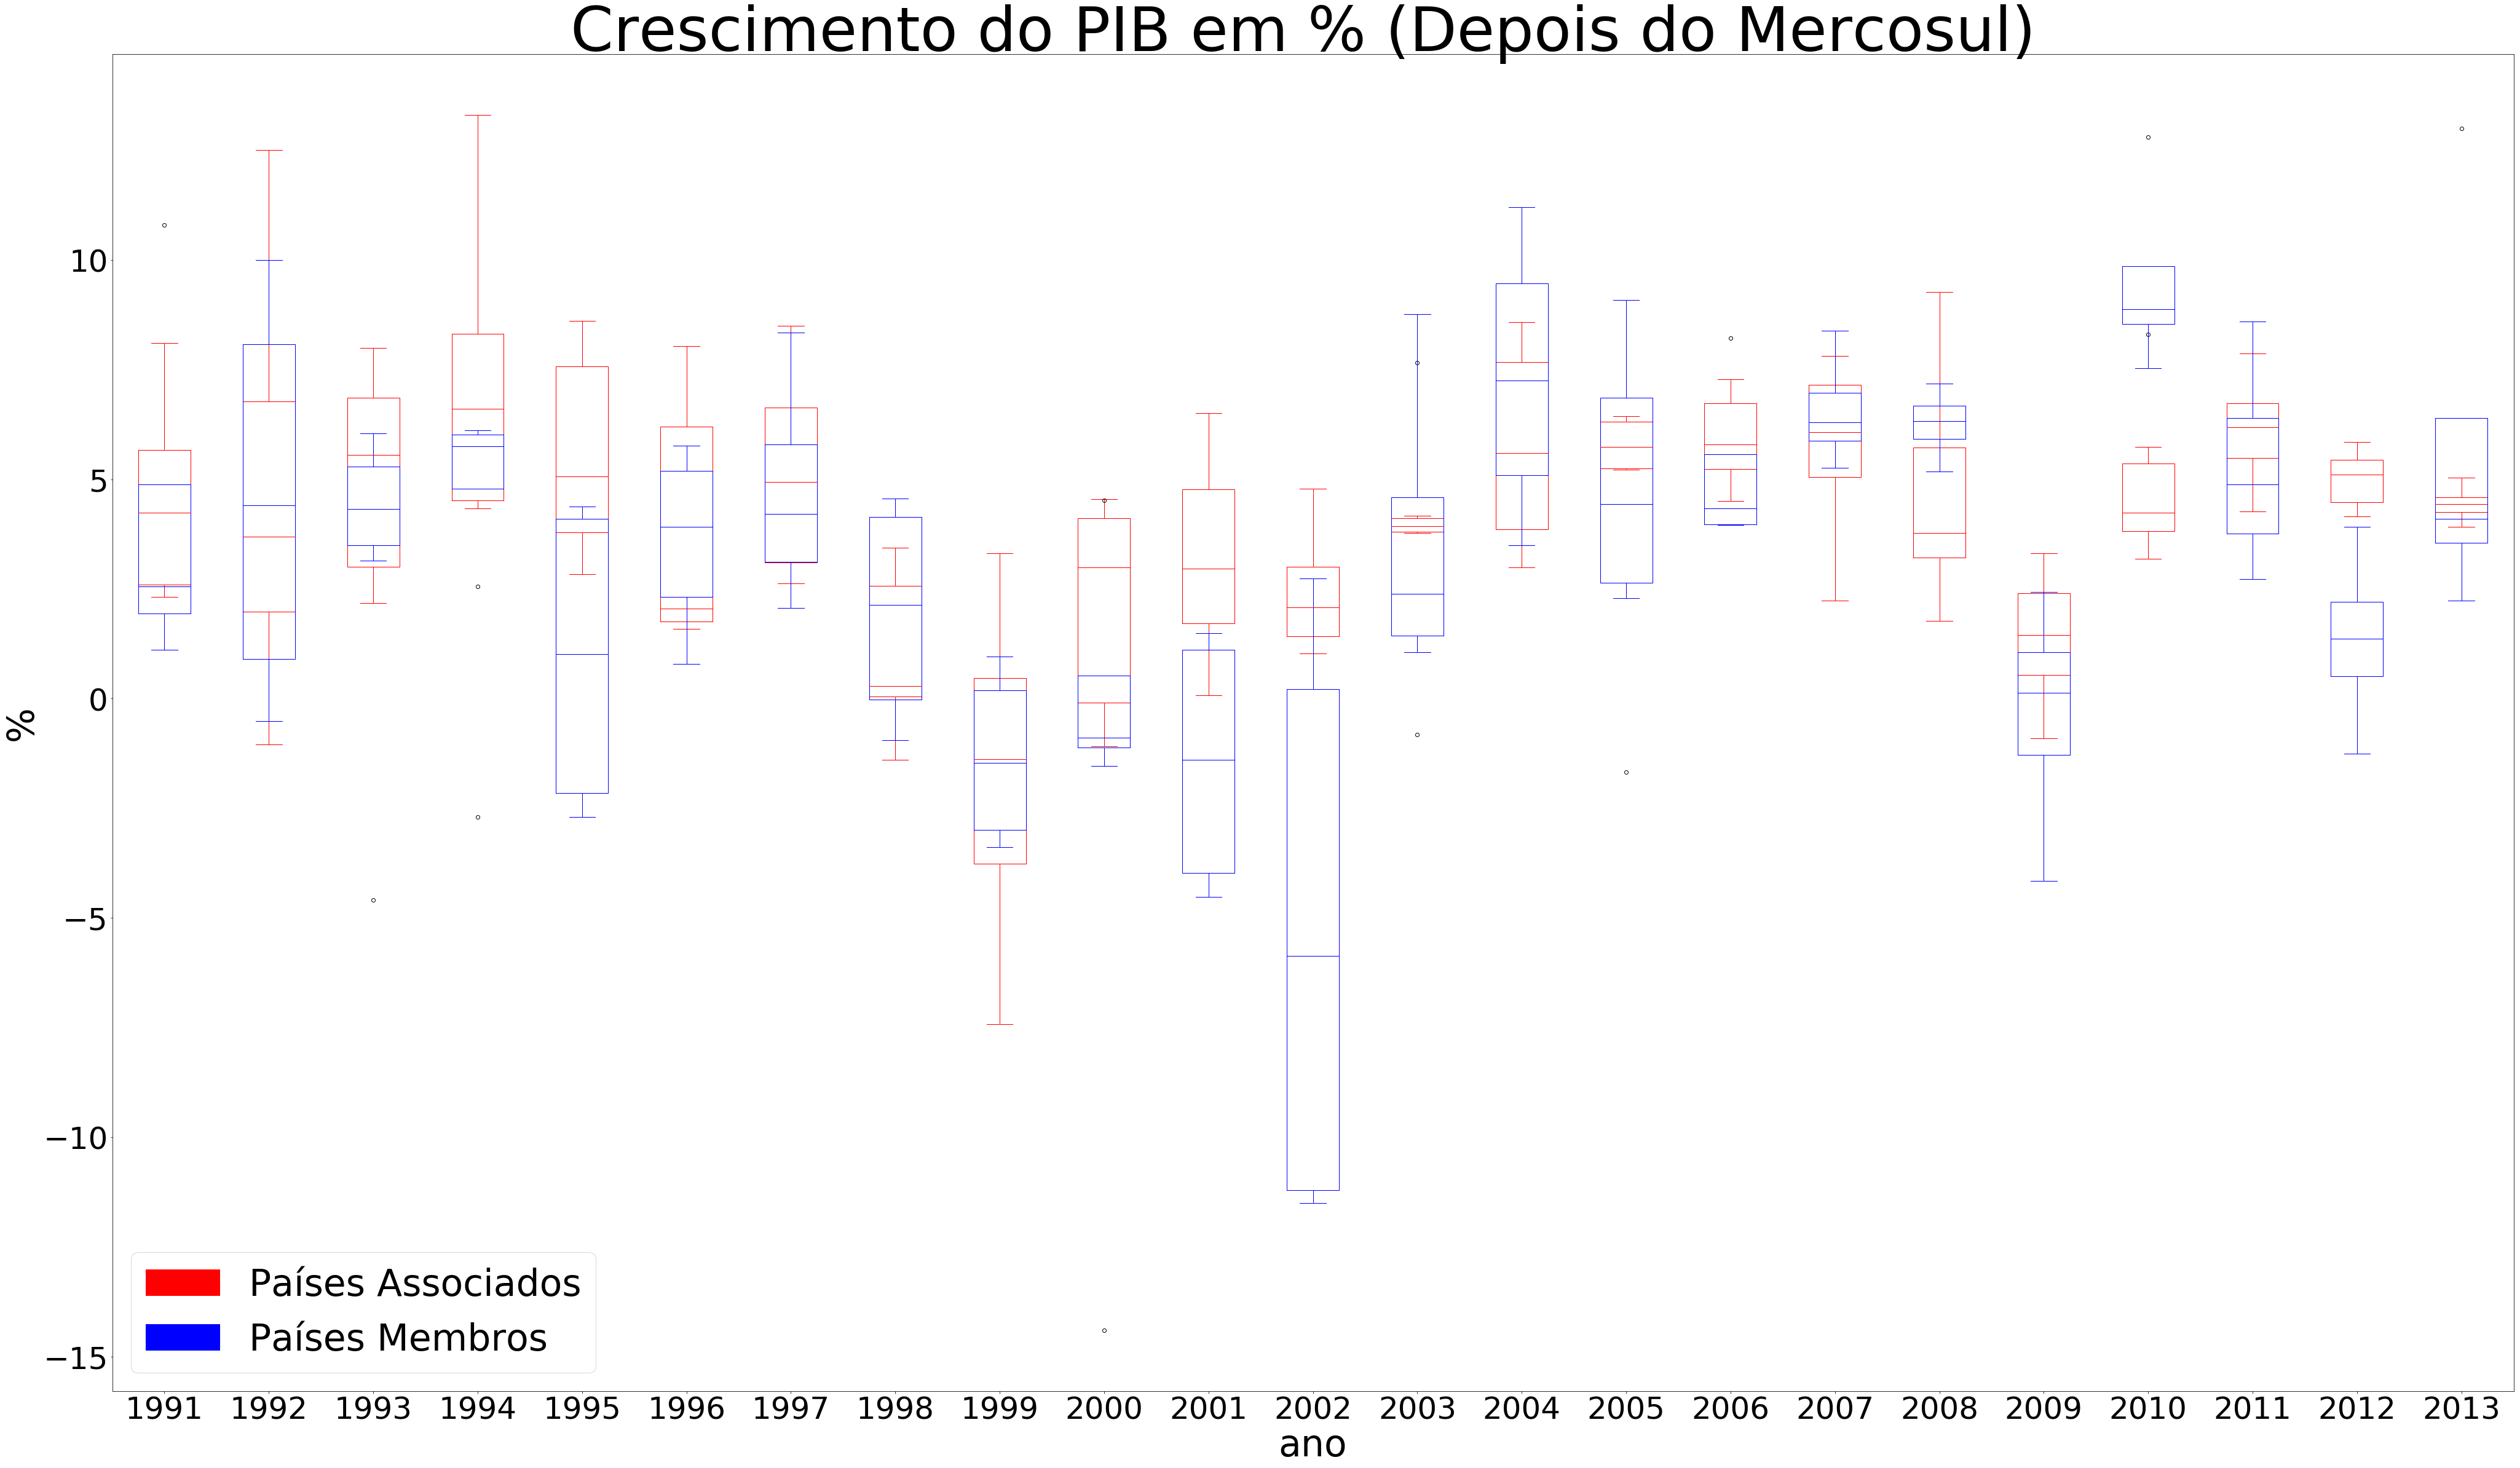

In [72]:
ax = crescimento_todos[crescimento_todos.Mercosul == 'nao'].plot.box(figsize=(70,40), color="r") 
crescimento_todos[crescimento_todos.Mercosul == 'sim'].plot.box(ax=ax,figsize=(70,40),color = 'b')
plt.ylabel('%',size = 60)
plt.title('Crescimento do PIB em % (Depois do Mercosul) ', size = 100)
plt.xlabel('ano',size = 60)
plt.tick_params(axis='x', labelsize=50)
plt.tick_params(axis='y', labelsize=50)
red_patch = mpatches.Patch(color='red', label='Países Associados')
blue_patch = mpatches.Patch(color='blue', label='Países Membros')
plt.legend(handles=[red_patch, blue_patch],fontsize=(60))
plt.show()

É possível observar que os países membros tem uma maior variação entre sí do que os associados. Além disso, nota-se que existem outliers para cima nos membros, oque é responsável por elevar a média desses, ou seja, a performace dos associados foi ainda melhor.

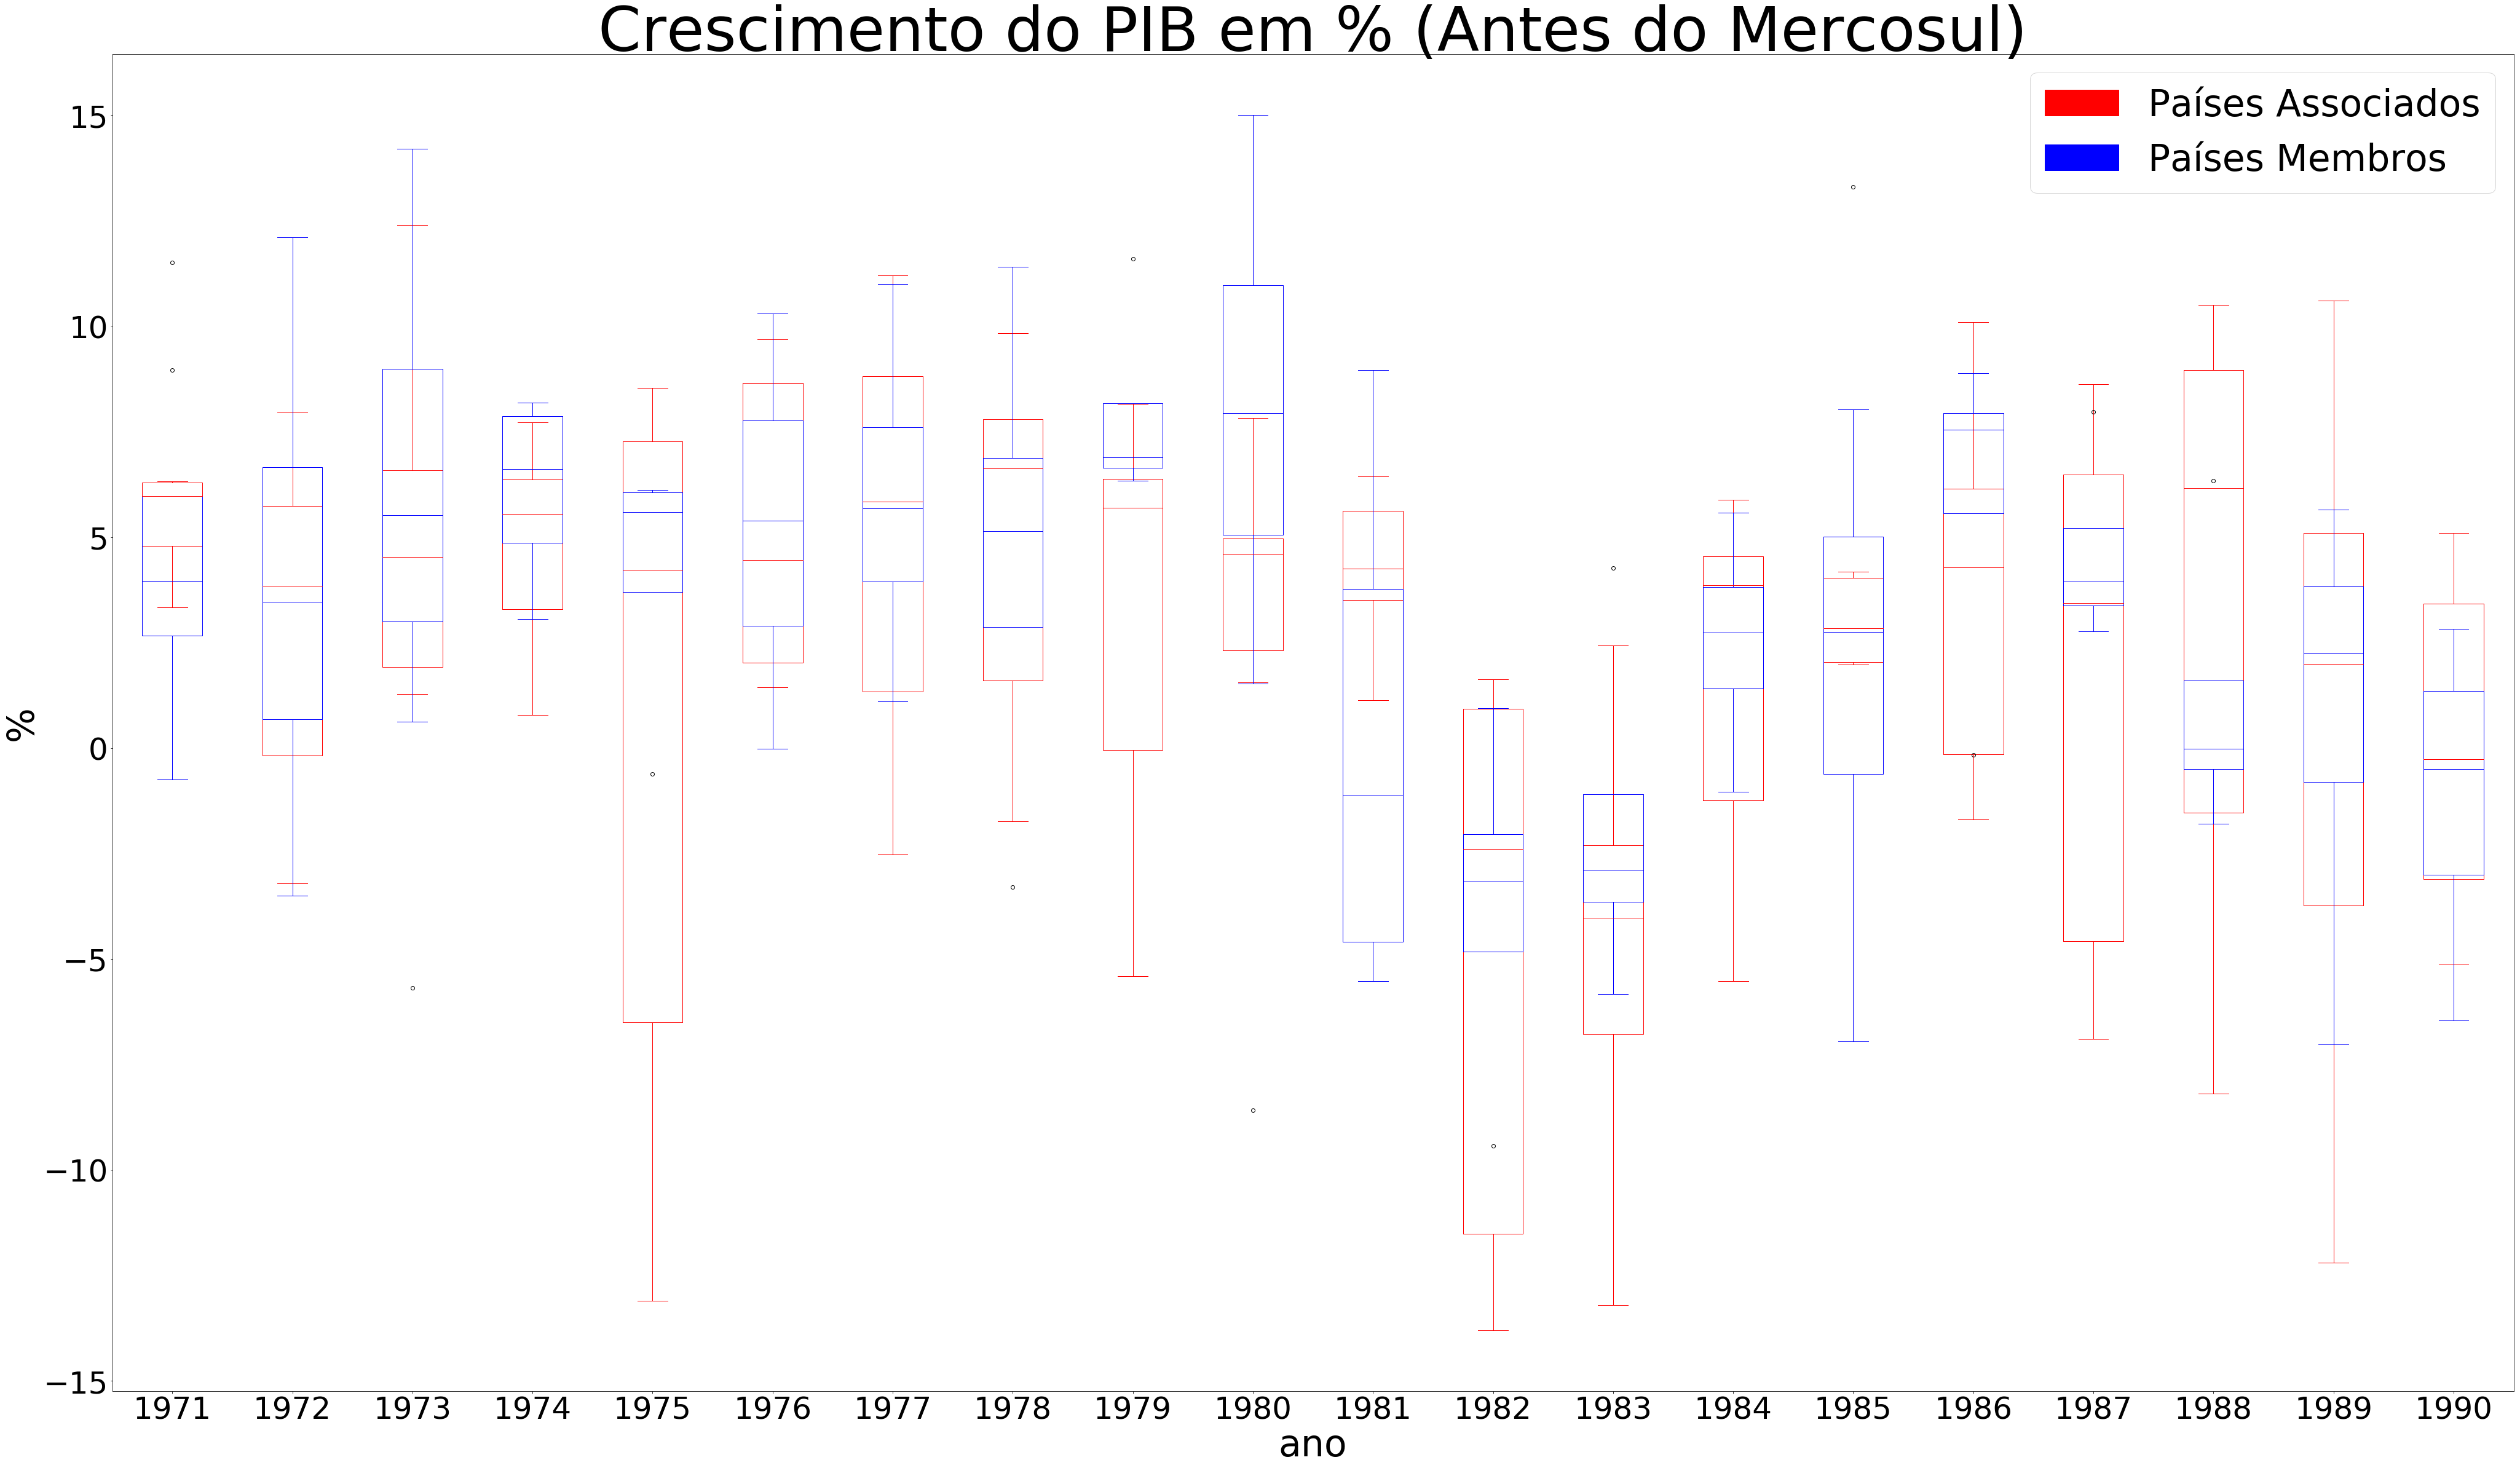

In [73]:
ax = crescimento_todos_a[crescimento_todos_a.Mercosul == 'nao'].plot.box(figsize=(70,40), color="r") 
crescimento_todos_a[crescimento_todos_a.Mercosul == 'sim'].plot.box(ax=ax,figsize=(70,40),color = 'b')
plt.ylabel('%',size = 60)
plt.title('Crescimento do PIB em % (Antes do Mercosul)', size = 100)
plt.xlabel('ano',size = 60)
plt.tick_params(axis='x', labelsize=50)
plt.tick_params(axis='y', labelsize=50)
red_patch = mpatches.Patch(color='red', label='Países Associados')
blue_patch = mpatches.Patch(color='blue', label='Países Membros')
plt.legend(handles=[red_patch, blue_patch],fontsize=(60))
plt.show()

Nesse gráfico é possivel verificar que existem muitos o outliers para baixo dos associados, ou seja a média está ligeiramente afetada para menos

## Conclusão

Responda à pergunta, argumento da melhor forma possível com base nos dados

    A análise dos dados nos mostrou que os países associados de fato fazem mais trocas comerciais do que os países membros, o que é um forte indício que o Mercosul por sí só não aumenta as importações e exportações. Apesar disso, é notável que os países membros estão em um movimento de crescente, enquanto os associados decrescente. Outro fator importante é o crescimento relativo do PIB. Ao analisar esses dados é possível perceber que os países associados estão indo ligeiramente melhor. Apesar disso é possível observar também que durante a crise de 2008 os países membros sofreram significativamente menos.
    Dessa forma, pode-se concluir que o Mercosul não tem muita relevancia para o desenvolvimento dos países, uma vez que as diferenças entre os membros e associados não são muito grandes para poderem ser consideradas essencias.
    O único fator que pesa em favor do Mercosul é que as trocas comerciais estão crescendo para os países membros, porém não da para determinar, como os datasets disponíveis, se isso é causado pelo bloco.
    Além disso, se pegarmos o Brasil como exemplo as importações para Argentina, Uruguai e Paraguai não são responsáveis nem por 10% do total, enquanto a China representa 30%, ou seja, o Brasil assim como a maioria dos países subdesenvolvidos agroexportadores dependem muito mais das grandes potências.
    
    Assim, pode-se concluir que a TEC como todo o Mercosul não tem tanta relevancia para o desenvolvimento, tantos dos países membros, quanto os associados.
 
links com dados da economia brasileira: https://oec.world/pt/profile/country/bra/
 https://www.dci.com.br/colunistas/mercosul-perde-a-relevancia-1.716441 - essa reportagem ilustra a perda de relevancia do bloco